In [26]:
from argopy import DataFetcher as ArgoDataFetcher
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker

In [22]:
ilat = -10
flat = 10
ilon = -130
flon = -110
idepth = 100
fdepth = 300
idate = "2005-01-01"
fdate = "2005-03-31"
ds = (
    ArgoDataFetcher()
    .region([ilon, flon, ilat, flat, idepth, fdepth, idate, fdate])
    .to_xarray()
)
ds

In [13]:
argo_profiles = ds.argo.point2profile()
argo_profiles

<xarray.Dataset>
Dimensions:          (N_LEVELS: 22, N_PROF: 69)
Coordinates:
    TIME             (N_PROF) datetime64[ns] 2005-01-01T09:34:05 ... 2005-03-...
  * N_PROF           (N_PROF) int64 57 40 59 32 0 8 16 ... 39 23 31 56 68 48 67
    LONGITUDE        (N_PROF) float64 -127.4 -111.7 -124.1 ... -112.8 -125.4
  * N_LEVELS         (N_LEVELS) int64 0 1 2 3 4 5 6 7 ... 15 16 17 18 19 20 21
    LATITUDE         (N_PROF) float64 9.465 8.144 1.128 ... -0.698 8.425 3.222
Data variables:
    CYCLE_NUMBER     (N_PROF) int64 81 67 10 26 68 68 68 ... 33 75 75 75 1 75 1
    DATA_MODE        (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int64 5900232 4900313 5900646 ... 4900313 5900839
    POSITION_QC      (N_PROF) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float64 105.4 115.3 ... 284.3 298.4
    PRES_QC          (N_PROF) int64 1 2 1 2 2 2 2 2 1 1 ... 1 2 2 2 2 2 1 1 2 1
    PSAL             (N_PROF, N_LEVELS) float64 34.71 34.71 34.73 ... 34.81 34.8
    PSAL_QC          (N_PROF) int64 1 2 1 2 1 2 2 2 1 1 ... 1 1 2 2 2 2 1 1 2 1
    TEMP             (N_PROF, N_LEVELS) float64 12.28 12.06 ... 11.62 11.42
    TEMP_QC          (N_PROF) int64 1 2 1 2 1 2 2 2 1 1 ... 1 1 2 2 2 2 1 1 2 1
    TIME_QC          (N_PROF) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           jovyan
    Fetched_date:         2020/08/13
    Fetched_constraints:  phy_[x=-130.00/-110.00; y=-10.00/10.00; z=100.0/300...
    Fetched_uri:          https://www.ifremer.fr/erddap/tabledap/ArgoFloats.n...
    history:              Variables filtered according to DATA_MODE; Variable...

In [14]:
# 2 Interpolate each profile vertically onto a pressure/depth surface of your choice

In [15]:
argo_interp = argo_profiles.argo.interp_std_levels([250])
argo_interp

<xarray.Dataset>
Dimensions:            (N_PROF: 69, PRES_INTERPOLATED: 1)
Coordinates:
    TIME               (N_PROF) datetime64[ns] 2005-01-01T09:34:05 ... 2005-0...
  * N_PROF             (N_PROF) int64 57 40 59 32 0 8 16 ... 23 31 56 68 48 67
    LONGITUDE          (N_PROF) float64 -127.4 -111.7 -124.1 ... -112.8 -125.4
    LATITUDE           (N_PROF) float64 9.465 8.144 1.128 ... -0.698 8.425 3.222
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 250
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 81.0 67.0 10.0 26.0 ... 1.0 75.0 1.0
    DATA_MODE          (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION          (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 5.9e+06 4.9e+06 ... 4.9e+06 5.901e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float64 250.0 250.0 ... 250.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float64 34.71 34.73 ... 34.85
    TEMP               (N_PROF, PRES_INTERPOLATED) float64 10.43 10.63 ... 12.12
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           jovyan
    Fetched_date:         2020/08/13
    Fetched_constraints:  phy_[x=-130.00/-110.00; y=-10.00/10.00; z=100.0/300...
    Fetched_uri:          https://www.ifremer.fr/erddap/tabledap/ArgoFloats.n...
    history:              Variables filtered according to DATA_MODE; Variable...

In [16]:
selected_vars = argo_interp[["LATITUDE", "LONGITUDE", "TIME", "TEMP"]]
selected_vars

<xarray.Dataset>
Dimensions:            (N_PROF: 69, PRES_INTERPOLATED: 1)
Coordinates:
    LATITUDE           (N_PROF) float64 9.465 8.144 1.128 ... -0.698 8.425 3.222
    LONGITUDE          (N_PROF) float64 -127.4 -111.7 -124.1 ... -112.8 -125.4
    TIME               (N_PROF) datetime64[ns] 2005-01-01T09:34:05 ... 2005-0...
  * N_PROF             (N_PROF) int64 57 40 59 32 0 8 16 ... 23 31 56 68 48 67
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 250
Data variables:
    TEMP               (N_PROF, PRES_INTERPOLATED) float64 10.43 10.63 ... 12.12
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           jovyan
    Fetched_date:         2020/08/13
    Fetched_constraints:  phy_[x=-130.00/-110.00; y=-10.00/10.00; z=100.0/300...
    Fetched_uri:          https://www.ifremer.fr/erddap/tabledap/ArgoFloats.n...
    history:              Variables filtered according to DATA_MODE; Variable...

In [7]:
# 3 Find the "mean state" of temperature by fitting 2d polynomials using a least squares fit.
# -It may also be important to add a seasonal cycle, modeled as a linear combination of seasonal harmonics

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import lsq_linear
from typing import Iterable


def get_harmonics(nharmonics, time, period=365):
    """Compute the requested number of harmonics
    for a set time.
    
    Parameters
    ----------
    nharmonics : int
        Number of harmonics to compute
    time : int, Iterable
        Time point within period of oscillation.
        This can be either a single int or a 1d-array
    period : int, optional
        Period of oscillation
        
    Returns
    -------
    harmonics: 2d-array
        Array of shape (len(time), nharmonics*2) where
        nharmonics*2 accounts for the cos and sin terms.
    """
    harmonics = np.arange(1, nharmonics + 1)
    if isinstance(time, Iterable):
        time = np.asarray(time)[:, np.newaxis]
        harmonics = harmonics[np.newaxis, :]
    phase = 2 * np.pi * harmonics * time / period
    return np.concatenate([np.cos(phase), np.sin(phase)], axis=-1)


def build_basis(lat, lon, time, nharmonics):
    """Build the 2d local polynomial regression basis
    according to Park2020
    """
    local_polynomlial_reg = np.ones((lat.size, 6 + nharmonics * 2))
    local_polynomlial_reg[:, 1] = lon
    local_polynomlial_reg[:, 2] = lat
    local_polynomlial_reg[:, 3] = lon * lat
    local_polynomlial_reg[:, 4] = lon ** 2
    local_polynomlial_reg[:, 5] = lat ** 2
    local_polynomlial_reg[:, 6:] = get_harmonics(nharmonics, time)
    return local_polynomlial_reg


def find_mean_state(lat, lon, time, data, nharmonics=2):
    """Find the mean state
    
    Parameters
    ----------
    lat, lon, time, data : 1d-array
        Arrays containing latitude, longitude, day of year and
        data.
    nharmonics: int, optional
        Number of harmonics to add into the basis functions
    """
    return lsq_linear(build_basis(lat, lon, time, nharmonics), data)

In [19]:
mean_state_fit = find_mean_state(
    selected_vars.LATITUDE,
    selected_vars.LONGITUDE,
    selected_vars.TIME.dt.dayofyear,
    selected_vars.TEMP.data.flatten(),
)
mean_state_fit

 active_mask: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
        cost: 6.013969857849907
         fun: array([-0.34530282,  0.40630337, -0.33271212,  0.00660185,  0.1277547 ,
       -0.18341529,  0.11594188,  0.7736394 ,  0.51419376, -0.82850065,
        0.16534217, -0.36026173,  0.04886152, -0.11996285, -0.10274211,
        0.09290713, -0.38156764,  0.45517568, -0.30934224, -0.54931724,
        0.19390325, -0.18620871, -0.09038475, -0.04528664,  0.46694867,
        0.65017712, -0.07717885, -0.68531996,  0.35276548,  0.35028664,
       -0.03309962,  0.31661476, -0.15593223,  0.67246968, -0.03135767,
       -0.45296566,  0.23299715,  0.09176463, -0.20430153, -0.06176959,
       -0.38723671,  0.2812534 , -0.47782263, -0.69595802,  0.16870834,
       -0.28488854,  0.25547043,  0.14890221,  0.92903683, -0.09780654,
       -0.37828266, -0.86346638,  0.16326893, -0.09959624,  0.26067846,
        0.08229702,  1.03850783,  0.01236246, -0.35510803, -0.8348662 ,
        0.18298363, -0.34333

In [38]:
lat = np.arange(ilat, flat)
lon = np.arange(ilon, flon)
ans = np.matmul(build_basis(lat, lon, 40, 2), mean_state_fit.x)
# This result should be computed for every single pair of (lat, lon)
# in order to obtain a gridded field.

In [11]:
# 4 plot the original data and the mean state and make sure it looks sensible

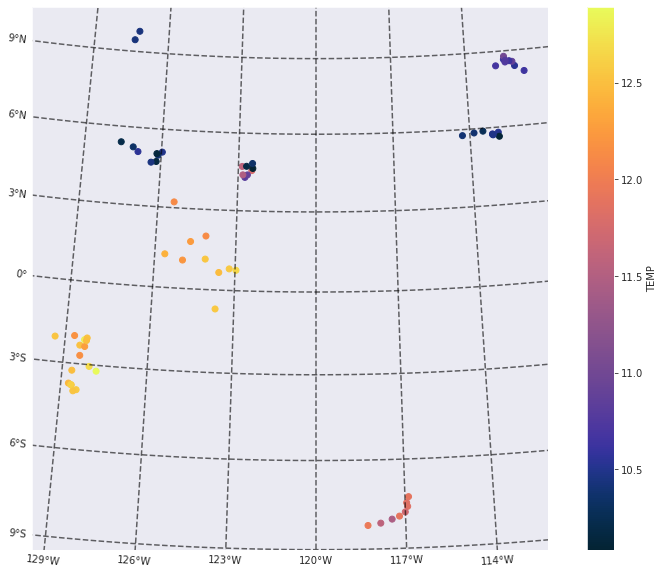

In [48]:
'''Plot Original Data'''

fig = plt.figure(figsize=(14,10))

'''Projections'''
proj = ccrs.LambertConformal(central_longitude = (ilon+flon)/2, central_latitude = (ilat+flat)/2)
cmap = cmocean.cm.thermal #setting colormap
ax = plt.axes(projection = proj)

'''Plot'''
selected_vars.plot.scatter(x='LONGITUDE', y='LATITUDE', hue='TEMP', cmap = cmap, transform = ccrs.PlateCarree())
coast_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='k', facecolor='0.7')
ax.add_feature(coast_50m)

'''Gridlines'''
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False,
                  linewidth=1.5, color='black', alpha=0.6, linestyle='--')
gl.right_labels = False
gl.top_labels = False
gl.xlocator = mticker.FixedLocator([-129,-126,-123,-120,-117,-114]) #modern

plt.show()

In [ ]:
'''Plot Mean State'''



In [12]:
# 5 remove the "mean state" from the original data